In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ds_ayush_bhadouriya/csv_files/cleaned_data.csv')

# Metric Calculation: Win Rate and Avg Risk
df['is_win'] = df['Closed PnL'] > 0
metrics = df.groupby('classification').agg({
    'Closed PnL': ['mean', 'median'],
    'Size USD': 'mean',
    'is_win': 'mean'
}).reset_index()
metrics.columns = ['Sentiment', 'Avg_PnL', 'Median_PnL', 'Avg_Size', 'Win_Rate']
metrics.to_csv('/content/drive/MyDrive/ds_ayush_bhadouriya/csv_files/sentiment_performance.csv', index=False)

In [3]:
account_stats = df.groupby('Account').agg({
    'Closed PnL': 'mean',
    'Size USD': 'mean',
    'is_win': 'mean'
}).fillna(0)

scaler = StandardScaler()
scaled = scaler.fit_transform(account_stats)
kmeans = KMeans(n_clusters=3, random_state=42)
account_stats['cluster'] = kmeans.fit_predict(scaled)

In [4]:
print("--- Trading Signal Summary ---")
for _, row in metrics.iterrows():
    print(f"Sentiment: {row['Sentiment']} | Win Rate: {row['Win_Rate']:.2%} | Avg PnL: ${row['Avg_PnL']:.2f}")

--- Trading Signal Summary ---
Sentiment: Extreme Greed | Win Rate: 49.01% | Avg PnL: $25.42
Sentiment: Fear | Win Rate: 41.51% | Avg PnL: $50.05
Sentiment: Greed | Win Rate: 44.65% | Avg PnL: $87.89
Sentiment: Neutral | Win Rate: 31.72% | Avg PnL: $22.23


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

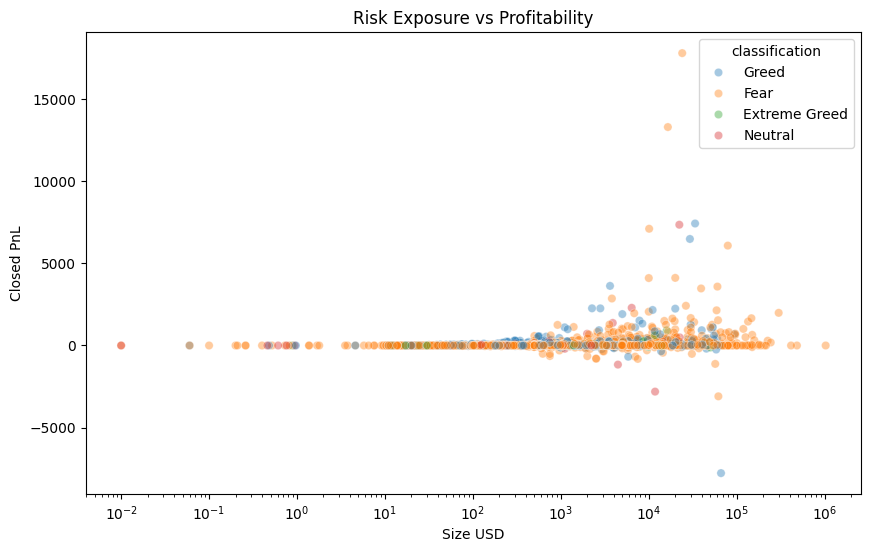

In [6]:
# Plotting Risk vs PnL
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(5000), x='Size USD', y='Closed PnL', hue='classification', alpha=0.4)
plt.xscale('log')
plt.title('Risk Exposure vs Profitability')
plt.savefig('/content/drive/MyDrive/ds_ayush_bhadouriya/outputs/size_pnl_scatter.png')